# Classification benchmarks using Logistic Regression

#### Loading necessary packages
- Remember to run setup.sh

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2

2024-03-18 16:06:07.621972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# loading CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# defining what the labels correspond to - found on the CIFAR-10 documentation
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# converting the numeric labels in the actual ones
y_train = np.array(cifar10_labels)[y_train]
y_test = np.array(cifar10_labels)[y_test]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


['horse']


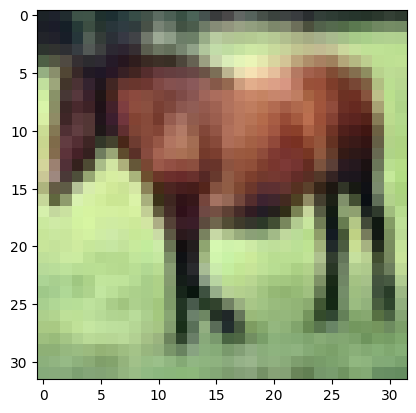

In [4]:
# just doing a sanity check making sure that the labels matches the images
plt.imshow(X_train[7])
print(y_train[7])

#### Preprocessing the images

['horse']


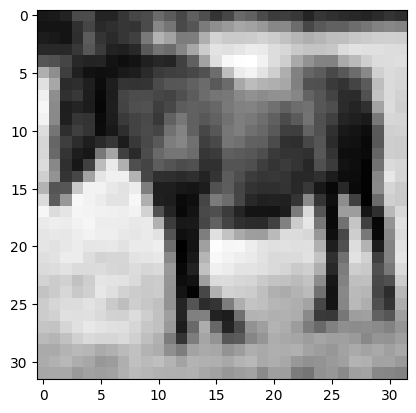

In [7]:
# converting both the training and the test images to grayscale
X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

# normalizing the images
X_train_normalized = X_train_gray / 255.0
X_test_normalized = X_test_gray / 255.0

# sanity test to make sure everything is working as intended
plt.imshow(X_train_normalized[7], cmap=plt.cm.gray)
print(y_train[7])

# flattening the images in accordance with the README for the assignment
X_train_processed = X_train_normalized.reshape(-1, 1024)
X_test_processed = X_test_normalized.reshape(-1, 1024)

#### Parameter GridSearch
- In order to experiment with optimal parameters for the model, we will employ the GridSearch module of SkLearn
- First, we define a parameter grid. We will try to change the solver, regularization strength, tolerence and the maximum number of iterations.
- For the solver, only lbfgs, sag and saga are appropiate for large multiclass datasets. We will therefore only try those.
- First, tried with more parameters but the search was literally taking hours to run. Therefore, I reduced the number of parameters, removed the max_iterations in the gridsearch and also settled on lbfgs as the solver.

In [13]:
# Specifying the parameters to try out
parameter_grid = {
    "C": [0.001, 0.01, 0.1],
    "tol": [0.0001, 0.001, 0.01]
}

# Initilizing the gridsearch
grid_search = GridSearchCV(LogisticRegression(), parameter_grid)

# applying the gridsearch to the training data
grid_search.fit(X_train_processed, y_train)

# getting the most optimal hyperparameters for the model
print("Best parameters:", grid_search.best_params_)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best parameters: {'C': 0.01, 'tol': 0.0001}


/home/ucloud/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression model

In [15]:
# Initialize and train the logistic regression classifier based on the previous gridsearch (optimal C = 0.01 & tol = 0.0001)
clf = LogisticRegression(tol=0.0001, 
                         solver='lbfgs',
                         C = 0.01,
                         multi_class='multinomial').fit(X_train_processed, y_train)

clf.fit(X_train_processed, y_train)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/ucloud/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

LogisticRegression(C=0.01, multi_class='multinomial')

In [17]:
# Evaluate the classifier
y_pred = clf.predict(X_test_processed)

# generate and save classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Save classification report
with open("../out/LogisticClassifierReport.txt", "w") as f:
    f.write(str(report))

              precision    recall  f1-score   support

    airplane       0.35      0.39      0.37      1000
  automobile       0.37      0.38      0.38      1000
        bird       0.27      0.23      0.25      1000
         cat       0.23      0.17      0.19      1000
        deer       0.25      0.21      0.23      1000
         dog       0.30      0.31      0.31      1000
        frog       0.29      0.33      0.31      1000
       horse       0.33      0.30      0.31      1000
        ship       0.33      0.43      0.38      1000
       truck       0.39      0.44      0.42      1000

    accuracy                           0.32     10000
   macro avg       0.31      0.32      0.31     10000
weighted avg       0.31      0.32      0.31     10000

